In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from baseline_model import BaselineBEPSModel
from alternate_proposal_model import AlternativeBEPSModel

In [3]:
JAN_TIMELINE_PATH = '../data/input_data/scen_1_reformatted.csv'
JUNE_TIMELINE_PATH = '../data/input_data/scen_2_reformatted_8_3.csv'
BUILDING_DATA_PATH = '../data/input_data/building_data_recleaned_8_3.csv'

In [4]:
df = pd.read_csv(BUILDING_DATA_PATH)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OSEBuildingID,BuildingName,BuildingType,Type_of_Bulding,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,...,ThirdLargestPropertyUseType OSE,ThirdLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA Analysis,Electricity(kBtu),Steam(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Total_GFA,sq_ft_classification
0,0,0,0,1,MAYFLOWER PARK HOTEL,NonResidential,NonResidential,88434,88434,0,...,NaN,0,0,3871996,2159078,1320791,208.8,2.4,88434,C
1,1,1,1,2,PARAMOUNT HOTEL,NonResidential,NonResidential,103566,88502,15064,...,Restaurant,4622,4622,2946902,0,5059502,286.9,3.2,103566,C
2,2,2,2,3,WESTIN HOTEL (Parent Building),NonResidential,NonResidential,956110,759392,196718,...,Recreation,0,0,44075841,22601024,1426400,1549.0,2.0,895128,A
3,3,3,3,5,HOTEL MAX,NonResidential,NonResidential,61320,61320,0,...,NaN,0,0,2201145,2104444,2013415,232.4,3.8,61320,C
4,4,4,4,8,WARWICK SEATTLE HOTEL,NonResidential,NonResidential,175580,113580,62000,...,Recreation,0,0,5444815,0,10430292,587.5,5.2,191454,B


In [5]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'OSEBuildingID',
       'BuildingName', 'BuildingType', 'Type_of_Bulding', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'Total_sqft',
       'percent_sqft_1st', 'percent_sqft_2nd', 'percent_sqft_3rd',
       'LargestPropertyUseType', 'LargestPropertyUseType OSE',
       'LargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA Analysis',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseType OSE',
       'SecondLargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA Analysis',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseType OSE',
       'ThirdLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA Analysis', 'Electricity(kBtu)',
       'Steam(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Total_GFA', 'sq_ft_classification'],
      dtype='object')

In [4]:
JAN_SCENARIO_FINES_YEARS = [2030, 2035, 2040, 2045, 2050]
JUNE_SCENARIO_FINES_YEARS = [2035, 2040, 2045, 2050]

FINE_PER_SQFT = 2.5

In [5]:
EMISSIONS_PATH = '../data/input_data/energy_emissions.csv'

In [8]:
jan_model = BaselineBEPSModel(EMISSIONS_PATH, JAN_TIMELINE_PATH, BUILDING_DATA_PATH, JAN_SCENARIO_FINES_YEARS, FINE_PER_SQFT)

In [9]:
jan_model.calculate_baseline_model(2027, 2050)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)
/Users/ihc/programming/350_seattle/BPS/experiments/benc

Model calculations complete. Access the model dataframe as model_name.scenario_results


In [11]:
jan_model.scenario_results.columns

Index(['OSEBuildingID', 'BuildingName', 'Total_sqft', 'sq_ft_classification',
       'LargestPropertyUseType OSE', 'SecondLargestPropertyUseType OSE',
       'ThirdLargestPropertyUseType OSE', 'year', 'expected_baseline',
       'expected_baseline_ghgi', 'city_ghgi_target', 'compliant_ghgi',
       'compliant_emissions', 'compliance_status', 'compliance_fees'],
      dtype='object')

In [12]:
jan_model.scenario_results.to_csv('jan_baseline_8_3.csv')

In [17]:
june_model = BaselineBEPSModel(EMISSIONS_PATH, JUNE_TIMELINE_PATH, BUILDING_DATA_PATH, JUNE_SCENARIO_FINES_YEARS, FINE_PER_SQFT)

In [18]:
june_model.calculate_baseline_model(2027, 2050)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)
/Users/ihc/programming/350_seattle/BPS/experiments/benc

Model calculations complete. Access the model dataframe as model_name.scenario_results


In [82]:
june_model = pd.read_csv('june_baseline_8_3.csv')

## Alternative GHGITs model

In this ammendment, buildings can use the alternate compliance for all compliance periods if:

- Building portfolio, district campus, or connected buildings.
- A nonresidential building with more than fifty percent of the covered building with the building activity type of “Other” or of a type not covered in Table A for Section 20 22.925.070.
- A covered building that has a baseline GHGI greater than three and one-half times the covered building’s standard GHGIT for the 2031-2035 compliance interval. baseline GHGI (CO2e/SF/yr) > 3.5 * standard GHGIT (CO2e/SF/yr). **NB**: this model assumes this is the city standard GHGIT for that building in 2035.

### Alternative GHGITs:
Alternative GHGITs are defined as follows: 
                                                                                                                                                                                                                                                                                           
Nonresidential:

- Seventy-five percent of the baseline GHGI for the 2027-2030 compliance interval

- 50 percent of the baseline GHGI for the 2031-2035 compliance interval

- 25 percent of the baseline GHGI for the 2036-2040 compliance interval

- Net zero for the 2041-2045 compliance interval

Multifamily:

- 75 percent of the baseline GHGI for the 2031-2035 compliance interval

- 50 percent of the baseline GHGI for the 2036-2040 compliance interval

- 25 percent of the baseline GHGI for the 2041-2045 compliance interval

- Net zero for the 2046-2050 compliance interval


In [22]:
# Load building owners

# Three files:
# building_data: same building data we've used for baseline
# parcel_owners: the owners listed on the King County Tax Assessor website
# downtown_owners: owners sleuthed for buildings >100k sq ft in downtown Seattle

# Add owners to building_data; if a downtown owner, use that, otherwise use parcel owner

building_data = pd.read_csv(BUILDING_DATA_PATH)
parcel_owners = pd.read_csv('../data/input_data/raw_data/updated_owners_2_15_23.csv')
downtown_owners = pd.read_csv('../data/input_data/raw_data/Downtown Seattle Building Ownership Results - BuildingsOver100KSqFt.csv')

In [23]:
parcel_owners.head()

,Unnamed: 0,OSEBuildingID,TaxParcelIdentificationNumber,DataYear,BuildingType,BuildingName,Owner,CouncilDistrictCode,Neighborhood,Units,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Outlier,ComplianceIssue,ComplianceStatus,Comments,DefaultData,LegislationPropertyType,Dept
0,0,50148,7733600135,2020,NonResidential,RESIDENCE INN SEATTLE U,TMUD GSL LLC,4.0,NORTHEAST,NaN,...,54695.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Hotel,NaN
1,1,50150,1991200090,2020,NonResidential,HYATT HOUSE,HH SEATTLE LLC,1.0,LAKE UNION,NaN,...,28069.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Hotel,NaN
2,2,50160,659000775,2020,NonResidential,AMAZON DOPPLER BUILDING,ACORN DEVELOPMENT LLC,7.0,DOWNTOWN,NaN,...,448625.0,Convention Center,59672.0,NaN,No Issue,Compliant,NaN,NaN,Office,NaN
3,3,50166,4083306985,2020,NonResidential,TABLEAU (NORTH EDGE),BRE-BMR 34TH LLC,1.0,LAKE UNION,NaN,...,117684.0,Restaurant,2839.0,NaN,No Issue,Compliant,NaN,NaN,Office,NaN
4,4,50192,660001605,2020,NonResidential,MIDTOWN 21 (AMAZON),MIDTOWN21 LLC,1.0,DOWNTOWN,NaN,...,110813.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Office,NaN


In [9]:
downtown_owners.head()

,f,Owning Entity Best Guess (lookup into OwningEntities tab),HQ City,"Assets, $B, Best Guess",Owning Entity Category,Public/Private/Nonprofit/Condo status,"Company Info -- business model, how assets found, etc, incl links to evidence",Sustainability claim (any we happened to find while researching ownership),How Sleuthed. NOTE sheets bug broke hyperlinks. See tab AllSleuthData for links to supporting info,Who sleuthed owner,...,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Outlier,ComplianceIssue,ComplianceStatus,Comments,DefaultData,LegislationPropertyType
0,1900 9TH AVE,Seattle Children's Healthcare System,Seattle,NaN,Health Care (nonprofit),Nonprofit/Religious Ownership,Parent organiation for Seattle Childrens Hospi...,NaN,"Emissions database lists Children's as owner, ...",Alice,...,Parking,49070.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Other
1,2411 ALASKAN WAY,Noble House,"Kirkland, WA",NaN,Hotel Chain,Private Ownership,Changed to unknown assets by Alice when I real...,https://www.noblehousehotels.com/sustainabili...,NaN,Alice,...,NaN,NaN,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Hotel
2,99 UNION ST,Bruce McCaw and condominium owners,Multiple (billionaire with no fixed address),1.0,Real Estate Investment,Private Ownership,99 Union/4 Seasons Hotel is a hotbed of well o...,NaN,https://www.bizjournals.com/seattle/news/2011/...,Neal,...,Multifamily Housing,169649.0,Parking,53919.0,NaN,No Issue,Compliant,NaN,NaN,Multifamily Housing
3,500 5TH AVE,King County,Seattle,NaN,"Government (Seattle, UW, etc)",Government,NaN,NaN,This is the KC Jail,Neal,...,Parking,45959.0,NaN,NaN,NaN,No Issue,Compliant,NaN,NaN,Other
4,1325 4TH AVE,University of Washington,Seattle,8.0,"Government (Seattle, UW, etc)",Government,"Note: For most UW-owned properties downtown, U...",NaN,Identified from TaxParcelOwner,Alice,...,Parking,197750.0,Other - Education,11888.0,NaN,No Issue,Compliant,NaN,NaN,Office


In [12]:
downtown_owners['Public/Private/Nonprofit/Condo status'].unique()

array(['Nonprofit/Religious Ownership', 'Private Ownership', 'Government',
       'Condos', nan], dtype=object)

In [142]:
parcel_owners[['OSEBuildingID', 'Owner']]

,OSEBuildingID,Owner
0,50148,TMUD GSL LLC
1,50150,HH SEATTLE LLC
2,50160,ACORN DEVELOPMENT LLC
3,50166,BRE-BMR 34TH LLC
4,50192,MIDTOWN21 LLC
...,...,...
3584,735,UNDEFINED
3585,22502,2240 WEST COMMODORE LLC
3586,22511,COMMODORE II LLC
3587,22504,FNA INVESTMENTS LLC


In [143]:
building_data_parcel_owners = pd.merge(building_data, parcel_owners[['OSEBuildingID', 'Owner']], how='left', on='OSEBuildingID')
building_data_parcel_owners.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OSEBuildingID,BuildingName,BuildingType,Type_of_Bulding,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,...,ThirdLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA Analysis,Electricity(kBtu),Steam(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Total_GFA,sq_ft_classification,Owner
0,0,0,0,1,MAYFLOWER PARK HOTEL,NonResidential,NonResidential,88434,88434,0,...,0,0,3871996,2159078,1320791,208.8,2.4,88434,C,ASPEN FLOWER LLC+MAYFLOWER HOTEL OWNER LLC
1,1,1,1,2,PARAMOUNT HOTEL,NonResidential,NonResidential,103566,88502,15064,...,4622,4622,2946902,0,5059502,286.9,3.2,103566,C,8TH & PINE JOINT VENTURE
2,2,2,2,3,WESTIN HOTEL (Parent Building),NonResidential,NonResidential,956110,759392,196718,...,0,0,44075841,22601024,1426400,1549.0,2.0,895128,A,SEATTLE HOST HOTEL COMPANY L L C
3,3,3,3,5,HOTEL MAX,NonResidential,NonResidential,61320,61320,0,...,0,0,2201145,2104444,2013415,232.4,3.8,61320,C,VANCE HOTEL ASSOCIATES LIMITED PARTNERSHIP
4,4,4,4,8,WARWICK SEATTLE HOTEL,NonResidential,NonResidential,175580,113580,62000,...,0,0,5444815,0,10430292,587.5,5.2,191454,B,UNDEFINED


In [146]:
building_data_all_metadata = pd.merge(building_data_parcel_owners, downtown_owners[['Public/Private/Nonprofit/Condo status', 'OSEBuildingID', 'Owning Entity Best Guess (lookup into OwningEntities tab)']], how='left', on='OSEBuildingID')
building_data_all_metadata.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OSEBuildingID,BuildingName,BuildingType,Type_of_Bulding,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,...,Electricity(kBtu),Steam(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Total_GFA,sq_ft_classification,Owner,Public/Private/Nonprofit/Condo status,Owning Entity Best Guess (lookup into OwningEntities tab)
0,0,0,0,1,MAYFLOWER PARK HOTEL,NonResidential,NonResidential,88434,88434,0,...,3871996,2159078,1320791,208.8,2.4,88434,C,ASPEN FLOWER LLC+MAYFLOWER HOTEL OWNER LLC,NaN,NaN
1,1,1,1,2,PARAMOUNT HOTEL,NonResidential,NonResidential,103566,88502,15064,...,2946902,0,5059502,286.9,3.2,103566,C,8TH & PINE JOINT VENTURE,NaN,NaN
2,2,2,2,3,WESTIN HOTEL (Parent Building),NonResidential,NonResidential,956110,759392,196718,...,44075841,22601024,1426400,1549.0,2.0,895128,A,SEATTLE HOST HOTEL COMPANY L L C,Private Ownership,Host Hotels and Resorts
3,3,3,3,5,HOTEL MAX,NonResidential,NonResidential,61320,61320,0,...,2201145,2104444,2013415,232.4,3.8,61320,C,VANCE HOTEL ASSOCIATES LIMITED PARTNERSHIP,NaN,NaN
4,4,4,4,8,WARWICK SEATTLE HOTEL,NonResidential,NonResidential,175580,113580,62000,...,5444815,0,10430292,587.5,5.2,191454,B,UNDEFINED,Private Ownership,Warwick Hotels and Resorts


In [16]:
building_data_all_metadata.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'OSEBuildingID',
       'BuildingName', 'BuildingType', 'Type_of_Bulding', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'Total_sqft',
       'percent_sqft_1st', 'percent_sqft_2nd', 'percent_sqft_3rd',
       'LargestPropertyUseType', 'LargestPropertyUseType OSE',
       'LargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA Analysis',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseType OSE',
       'SecondLargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA Analysis',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseType OSE',
       'ThirdLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA Analysis', 'Electricity(kBtu)',
       'Steam(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Total_GFA', 'sq_ft_classification', 'Owner',
       'Public/Private/Nonprofit/Condo status',
       'Owning Entity Best Guess (loo

In [147]:
def choose_owner(building):
    if pd.isna(building['Owning Entity Best Guess (lookup into OwningEntities tab)']):
        return building['Owner']
    return building['Owning Entity Best Guess (lookup into OwningEntities tab)']
    
building_data_all_metadata['best_guess_owner'] = building_data_all_metadata.apply(lambda building: choose_owner(building), axis=1)

In [158]:
building_data_all_metadata[pd.isna(building_data_all_metadata['best_guess_owner'])]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OSEBuildingID,BuildingName,BuildingType,Type_of_Bulding,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,...,Steam(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Total_GFA,sq_ft_classification,Owner,Public/Private/Nonprofit/Condo status,Owning Entity Best Guess (lookup into OwningEntities tab),best_guess_owner
50,50,50,50,67,QUALITY INN & SUITES - SEATTLE,NonResidential,NonResidential,113173,70627,42546,...,0,2010398,121.6,1.7,113173,C,NOT FOUND,NaN,NaN,NaN
115,115,115,115,195,KINDRED HOSPITAL,NonResidential,NonResidential,54224,54224,0,...,0,2383865,140.5,2.6,47012,D,NOT FOUND,NaN,NaN,NaN
116,116,116,116,197,NORDSTROM NORTHGATE 002,NonResidential,NonResidential,124342,124342,0,...,0,170811,51.6,0.4,122000,B,NOT FOUND,NaN,NaN,NaN
335,335,335,335,484,FRED ROGERS BLDG,NonResidential,NonResidential,67380,67380,0,...,0,0,0.0,0.0,0,F,NOT FOUND,NaN,NaN,NaN
358,358,358,358,517,SAM'S CLUB,NonResidential,NonResidential,144776,144776,0,...,0,0,15.9,0.1,144776,B,NOT FOUND,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,3481,3481,3481,50327,ONE LAKEFRONT AT 1414,Multifamily MR (5-9),Multifamily,33114,33114,0,...,0,271449,18.3,0.6,35028,D,NOT FOUND,NaN,NaN,NaN
3494,3494,3494,3494,50342,LAVENDER APARTMENTS,Multifamily LR (1-4),Multifamily,23090,23090,0,...,0,0,0.0,0.0,23090,E,NOT FOUND,NaN,NaN,NaN
3567,3567,3567,3567,50529,UW- New Life Sciences Building,NonResidential,NonResidential,254218,195398,58820,...,0,2379715,162.1,0.8,237410,B,NOT FOUND,NaN,NaN,NaN
3569,3569,3569,3569,50532,UW- MADRONA HALL (RESIDENTIAL),Multifamily MR (5-9),Multifamily,52428,40778,11650,...,0,0,8.8,0.2,49519,D,NOT FOUND,NaN,NaN,NaN


In [165]:
building_data_all_metadata.fillna(value={ 'best_guess_owner': 'NOT FOUND' }, inplace=True)

In [166]:
building_data_all_metadata[pd.isna(building_data_all_metadata['best_guess_owner'])]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OSEBuildingID,BuildingName,BuildingType,Type_of_Bulding,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,...,Steam(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Total_GFA,sq_ft_classification,Owner,Public/Private/Nonprofit/Condo status,Owning Entity Best Guess (lookup into OwningEntities tab),best_guess_owner


In [179]:
building_data_all_metadata.columns = ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'OSEBuildingID',
       'BuildingName', 'BuildingType', 'Type_of_Building', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'Total_sqft',
       'percent_sqft_1st', 'percent_sqft_2nd', 'percent_sqft_3rd',
       'LargestPropertyUseType', 'LargestPropertyUseType OSE',
       'LargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA Analysis',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseType OSE',
       'SecondLargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA Analysis',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseType OSE',
       'ThirdLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA Analysis', 'Electricity(kBtu)',
       'Steam(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Total_GFA', 'sq_ft_classification', 'Owner',
       'Public/Private/Nonprofit/Condo status',
       'Owning Entity Best Guess (lookup into OwningEntities tab)',
       'best_guess_owner']

In [180]:
building_data_all_metadata.to_csv('../data/input_data/building_data_all_metadata.csv')

In [81]:
BUILDING_DATA_ALL_METADATA_PATH = '../data/input_data/building_data_all_metadata.csv'

In [172]:
owner_size = building_data_all_metadata.groupby('best_guess_owner').size()

In [173]:
owner_size.to_csv('../data/owner_sizes.csv')

## What % owners have >1 building?

In [66]:
len(owner_size)

2007

In [67]:
len(owner_size[owner_size > 1])

181

In [28]:
import os

print(os.getcwd())

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models


### Method to test if it's a portfolio

In [38]:
def is_portfolio(building):
    return building['best_guess_owner'] != 'NOT FOUND' and owner_size[building['best_guess_owner']] > 1

In [57]:
is_portfolio(building_data_all_metadata.loc[2])

True

In [58]:
building_data_all_metadata.loc[2]

Unnamed: 0.2                                                                                2
Unnamed: 0.1                                                                                2
Unnamed: 0                                                                                  2
OSEBuildingID                                                                               3
BuildingName                                                   WESTIN HOTEL (Parent Building)
BuildingType                                                                   NonResidential
Type_of_Bulding                                                                NonResidential
PropertyGFATotal                                                                       956110
PropertyGFABuilding(s)                                                                 759392
PropertyGFAParking                                                                     196718
Total_sqft                                                  

In [59]:
owner_size['Host Hotels and Resorts']

2

In [61]:
def is_private(building):
    return building['Public/Private/Nonprofit/Condo status'] in ['Private Ownership', 'Condos', nan]

In [175]:
class AlternativeGHGIForBEPSModel(BaselineBEPSModel):
    def __init__(self, emissions_path, timeline_path, building_data_path, fine_years, fine_per_sqft, owner_sizes, baseline_model = None):
        '''
        emissions_path: file path to table of energy emissions factors for each year
        timeline_path: file path for proposed timeline of emissions reduction
        building_data_path: file path for buildings data
        fine_years: array of years where building owners can be fined for not being compliant
        alternative_calculations_function: takes a building as input and calculates the compliant emissions and compliance status
        baseline_model: baseline calculations from BaselineBEPSModel. If not provided, the instance will run the calculate_baseline_model method before running the alternative function
        '''
        super().__init__(emissions_path, timeline_path, building_data_path, fine_years, fine_per_sqft)
        self.owner_sizes = owner_sizes
        self.baseline_model = baseline_model
    
    def is_private(self, building):
        return building['Public/Private/Nonprofit/Condo status'] in ['Private Ownership', 'Condos', nan]

    def is_portfolio(self, building):
        return building['best_guess_owner'] != 'NOT FOUND' and building['best_guess_owner'] != 'UNDEFINED' and self.owner_sizes[building['best_guess_owner']] > 1
    
    def eligible_for_exception_2(self, building):
        if building['Type_of_Building'] != 'NonResidential':
            return False
        
        if pd.isna(building['LargestPropertyUseType OSE']):
            is_nan = 0
        elif pd.isna(building['SecondLargestPropertyUseType OSE']):
            is_nan = 1
        elif pd.isna(building['ThirdLargestPropertyUseType OSE']):
            is_nan = 2
        else:
            is_nan = -1
        
        is_other = list(building[['LargestPropertyUseType OSE', 'SecondLargestPropertyUseType OSE', 'ThirdLargestPropertyUseType OSE']]).index('Other') if 'Other' in list(building[['LargestPropertyUseType OSE', 'SecondLargestPropertyUseType OSE', 'ThirdLargestPropertyUseType OSE']]) else -1
        
        gfa_cols = ['percent_sqft_1st', 'percent_sqft_2nd', 'percent_sqft_3rd']
        
        if is_nan > -1 and building[gfa_cols[is_nan]] > .5:
            return True
        
        if is_other > -1 and building[gfa_cols[is_other]] > .5:
            return True
        
        return False

    def get_stand_benchmark_2035(self, building):
        baseline = building['expected_baseline_ghgi']
        
        if building['LargestPropertyUseType OSE'] == 'nan' or pd.isna(building['LargestPropertyUseType OSE']):
            largest_ghgit = building['percent_sqft_1st'] * baseline
        else:
            largest_ghgit = building['percent_sqft_1st'] * self._find_ghgi_standard(2031, building['LargestPropertyUseType OSE'], building['sq_ft_classification'])
            
        if building['SecondLargestPropertyUseType OSE'] == 'nan' or pd.isna(building['SecondLargestPropertyUseType OSE']):
            second_ghgit = building['percent_sqft_2nd'] * baseline
        else:
            second_ghgit = building['percent_sqft_2nd'] * self._find_ghgi_standard(2031, building['SecondLargestPropertyUseType OSE'], building['sq_ft_classification'])
        
        if building['ThirdLargestPropertyUseType OSE'] == 'nan' or pd.isna(building['ThirdLargestPropertyUseType OSE']):
            third_ghgit = building['percent_sqft_3rd'] * baseline
        else:
            third_ghgit = building['percent_sqft_3rd'] * self._find_ghgi_standard(2031, building['ThirdLargestPropertyUseType OSE'], building['sq_ft_classification'])
        
        return largest_ghgit + second_ghgit + third_ghgit

    def eligible_for_exception_3(self, building):
        ghgit_2035 = self.get_stand_benchmark_2035(building)
        baseline_ghgi = self.baseline_model[(self.baseline_model['year'] == 2027) & (self.baseline_model['OSEBuildingID'] == building['OSEBuildingID'])].iloc[0]['expected_baseline_ghgi']
        
        return baseline_ghgi > ghgit_2035 * 3.5
    

    def can_use_alternative_ghgit(self, building):
        building_type = building['Type_of_Building']
        
        # is campus
        if building_type == 'Campus':
            return True
        
        # is portfolio
        if self.is_portfolio(building):
            return True
        
        # non residential > 50% "other"
        if self.eligible_for_exception_2(building):
            return True
        
        # baseline ghgi > 3.5 * standard ghgit
        if self.eligible_for_exception_3(building):
            return True
        
        return False

    def calc_alt_ghgi(self, building):
        if not building['can_use_alternative_ghgi']:
            return pd.NA
        
        baseline_ghgi = building['expected_baseline_ghgi']
        year = building['year']
        
        if building['Type_of_Building'] == 'Multifamily':
            if year < 2031:
                return baseline_ghgi
            if year >= 2031 and year <= 2035:
                return 0.66 * baseline_ghgi
            if year >= 2036 and year <= 2040:
                return 0.33 * baseline_ghgi
            if year > 2040:
                return 0
        else:
            if year >= 2027 and year <= 2030:
                return baseline_ghgi
            if year >= 2031 and year <= 2035:
                return 0.75 * baseline_ghgi
            if year >= 2036 and year <= 2040:
                return 0.5 * baseline_ghgi
            if year >= 2041 and year <= 2045:
                return .25 * baseline_ghgi
            if year > 2045:
                return 0
    
    def choose_compliance(self, building):
        if pd.isna(building['alt_ghgi']):
            return building['compliant_ghgi']
        else:
            return max(building['compliant_ghgi'], building['alt_ghgi'])

    def calc_alt_emissions(self, building):
        return building['alt_compliance'] * building['Total_sqft']

    def calculate_alternative_model(self):
        self._load_input_data()
        # todo: put in checking here
        # if not self.baseline_model:
        #     self.calculate_baseline_model()

        self.alternative_scenario = self.baseline_model[self.baseline_model.columns]
        self.alternative_scenario['can_use_alternative_ghgi'] = self.alternative_scenario.apply(lambda building: self.can_use_alternative_ghgit(building), axis=1)
        self.alternative_scenario['alt_ghgi'] = self.alternative_scenario.apply(lambda building: self.calc_alt_ghgi(building), axis=1)
        self.alternative_scenario['alt_compliance'] = self.alternative_scenario.apply(lambda building: self.choose_compliance(building), axis=1)
        self.alternative_scenario['alt_emissions'] = self.alternative_scenario.apply(lambda building: self.calc_alt_emissions(building), axis=1)
        
        print('You can now access your alternative scenario calculations at instance_name.alternative_scenario')

In [184]:
june_scen_for_alternate_ghgi = pd.read_csv('june_baseline_8_3.csv')

In [185]:
june_timeline = pd.read_csv(JUNE_TIMELINE_PATH)

In [186]:
june_scen_for_alternate_ghgi.columns

Index(['Unnamed: 0', 'OSEBuildingID', 'BuildingName', 'Total_sqft',
       'sq_ft_classification', 'LargestPropertyUseType OSE',
       'SecondLargestPropertyUseType OSE', 'ThirdLargestPropertyUseType OSE',
       'year', 'expected_baseline', 'expected_baseline_ghgi',
       'city_ghgi_target', 'compliant_ghgi', 'compliant_emissions',
       'compliance_status', 'compliance_fees'],
      dtype='object')

In [187]:
june_scen_for_alternate_ghgi = june_scen_for_alternate_ghgi.merge(building_data_all_metadata[[
    'Public/Private/Nonprofit/Condo status',
    'best_guess_owner', 
    'Type_of_Building',
    'percent_sqft_1st',
    'percent_sqft_2nd',
    'percent_sqft_3rd',
    'OSEBuildingID'
]], how='left', on='OSEBuildingID')

In [188]:
june_scen_for_alternate_ghgi.columns

Index(['Unnamed: 0', 'OSEBuildingID', 'BuildingName', 'Total_sqft',
       'sq_ft_classification', 'LargestPropertyUseType OSE',
       'SecondLargestPropertyUseType OSE', 'ThirdLargestPropertyUseType OSE',
       'year', 'expected_baseline', 'expected_baseline_ghgi',
       'city_ghgi_target', 'compliant_ghgi', 'compliant_emissions',
       'compliance_status', 'compliance_fees',
       'Public/Private/Nonprofit/Condo status', 'best_guess_owner',
       'Type_of_Building', 'percent_sqft_1st', 'percent_sqft_2nd',
       'percent_sqft_3rd'],
      dtype='object')

In [189]:
alternative_ghgi_model = AlternativeGHGIForBEPSModel(EMISSIONS_PATH, JUNE_TIMELINE_PATH, BUILDING_DATA_ALL_METADATA_PATH, [], 2.5, owner_size, june_scen_for_alternate_ghgi)

alternative_ghgi_model.calculate_alternative_model()

You can now access your alternative scenario calculations at instance_name.alternative_scenario


In [190]:
alternative_ghgi_model.alternative_scenario.head()

,Unnamed: 0,OSEBuildingID,BuildingName,Total_sqft,sq_ft_classification,LargestPropertyUseType OSE,SecondLargestPropertyUseType OSE,ThirdLargestPropertyUseType OSE,year,expected_baseline,...,Public/Private/Nonprofit/Condo status,best_guess_owner,Type_of_Building,percent_sqft_1st,percent_sqft_2nd,percent_sqft_3rd,can_use_alternative_ghgi,alt_ghgi,alt_compliance,alt_emissions
0,0,1,MAYFLOWER PARK HOTEL,88434,C,Hotel,NaN,NaN,2027.0,2.705014e+05,...,NaN,ASPEN FLOWER LLC+MAYFLOWER HOTEL OWNER LLC,NonResidential,1.00,0.0,0.00,False,<NA>,3.058794,2.705014e+05
1,1,2,PARAMOUNT HOTEL,88502,C,Hotel,NaN,Restaurant,2027.0,2.843616e+05,...,NaN,8TH & PINE JOINT VENTURE,NonResidential,0.95,0.0,0.05,False,<NA>,3.213052,2.843616e+05
2,2,3,WESTIN HOTEL (Parent Building),756493,A,Hotel,NaN,Recreation,2027.0,2.193901e+06,...,Private Ownership,Host Hotels and Resorts,NonResidential,1.00,0.0,0.00,True,2.900095,2.900095,2.193901e+06
3,3,5,HOTEL MAX,61320,C,Hotel,NaN,NaN,2027.0,2.934861e+05,...,NaN,VANCE HOTEL ASSOCIATES LIMITED PARTNERSHIP,NonResidential,1.00,0.0,0.00,False,<NA>,4.786141,2.934861e+05
4,4,8,WARWICK SEATTLE HOTEL,123445,B,Hotel,NaN,Recreation,2027.0,5.827520e+05,...,Private Ownership,Warwick Hotels and Resorts,NonResidential,1.00,0.0,0.00,False,<NA>,4.720742,5.827520e+05


In [191]:
alternative_ghgi_model.alternative_scenario.to_csv('alternative_ghgi_scenario.csv')

## Calculating differences between models

In [193]:
# January model 

jan_model = pd.read_csv('jan_baseline_8_3.csv')
jan_model_emissions_kg = jan_model['compliant_emissions'].sum()
jan_model_emissions_tons = jan_model_emissions_kg / 1000.0

jan_model_emissions_tons

3285969.465185662

In [195]:
# June model

baseline_in_2027 = june_scen_for_alternate_ghgi[june_scen_for_alternate_ghgi['year'] == 2027]['compliant_emissions'].sum()
baseline_in_2027_tons = baseline_in_2027 / 1000.0

june_model_emissions_kg = june_scen_for_alternate_ghgi['compliant_emissions'].sum()
june_model_emissions_tons = june_model_emissions_kg / 1000.0

print('Baseline: ' + str(baseline_in_2027_tons) + ' tons')
print('Emissions in June model: ' + str(june_model_emissions_tons))

Baseline: 457844.11428098497 tons
Emissions in June model: 4814919.286478417


In [196]:
print('Increase in emissions over January model:')
(june_model_emissions_tons - jan_model_emissions_tons) / jan_model_emissions_tons

Increase in emissions over January model:


0.46529641784311815

In [233]:
june_model_emissions_tons - jan_model_emissions_tons

1528949.8212927552

In [197]:
# Alternate GHGITs model

alternate_ghgit_emissions_kg = alternative_ghgi_model.alternative_scenario['alt_emissions'].sum()
alternate_ghgit_emissions_tons = alternate_ghgit_emissions_kg / 1000.0

alternate_ghgit_emissions_tons

5313197.121857929

In [198]:
print('Alternate GHGIT increase over Jan plan:')
print((alternate_ghgit_emissions_tons - jan_model_emissions_tons) / jan_model_emissions_tons)

print('Alternate GHGIT increase over basic June plan:')
print((alternate_ghgit_emissions_tons - june_model_emissions_tons) / june_model_emissions_tons)

Alternate GHGIT increase over Jan plan:
0.6169344171181231
Alternate GHGIT increase over basic June plan:
0.10348622806176828


In [234]:
alternate_ghgit_emissions_tons - june_model_emissions_tons

498277.83537951205

In [205]:
# Look at emissions per year

year_by_year_comparison = jan_model.groupby(by='year').agg({'compliant_emissions': 'sum'})

In [208]:
year_by_year_comparison.columns = ['Jan emissions']

In [209]:
year_by_year_comparison.head()

,Jan emissions
year,
2027.0,3.576994e+08
2028.0,3.334542e+08
2029.0,3.154803e+08
2030.0,2.810759e+08
2031.0,2.542997e+08


In [213]:
june_year_by_year = june_scen_for_alternate_ghgi.groupby(by='year').agg({'compliant_emissions': 'sum'})
june_year_by_year.columns = ['June emissions']

In [214]:
alternate_ghgit_year_by_year = alternative_ghgi_model.alternative_scenario.groupby(by='year').agg({'alt_emissions': 'sum'})
alternate_ghgit_year_by_year.columns = ['Alternate GHGIT emissions']

In [218]:
all_year_by_year = year_by_year_comparison.join([june_year_by_year, alternate_ghgit_year_by_year])

In [219]:
all_year_by_year

,Jan emissions,June emissions,Alternate GHGIT emissions
year,,,
2027.0,3.576994e+08,4.578441e+08,4.578494e+08
2028.0,3.334542e+08,4.578441e+08,4.578494e+08
2029.0,3.154803e+08,4.578441e+08,4.578494e+08
2030.0,2.810759e+08,4.219767e+08,4.219817e+08
2031.0,2.542997e+08,3.636792e+08,3.927621e+08
2032.0,2.324771e+08,3.305612e+08,3.715996e+08
2033.0,2.138285e+08,3.080682e+08,3.593920e+08
2034.0,1.978527e+08,2.914673e+08,3.452876e+08
2035.0,1.826752e+08,2.614468e+08,3.040571e+08


In [225]:
all_year_by_year.to_csv('annual_emissions_metric_tons_comparison.csv')

In [221]:
# How much emissions reduction on June plan in 2040-2050?
june_2039_emissions = all_year_by_year.loc[2039]['June emissions']

In [224]:
(baseline_in_2027 - june_2039_emissions) / baseline_in_2027

0.6113450897324546

61% of emissions reduction in the last 10 years! That's bonkers!

[Text(0.5, 1.0, 'Annual emissions (metric tons)')]

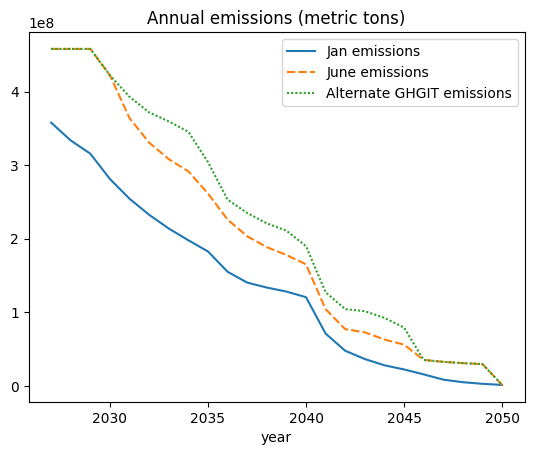

In [231]:
sns.lineplot(data=all_year_by_year).set(title='Annual emissions (metric tons)')